# Machine Learning Project 2022/2023 - Group 60

## Group members:

Beatriz Carmo - 20220685  
João Malho - 20220696  
Lizaveta Baryionak - 20220667  
Marta Antunes - 20221094  
Tomás Silva - 20221639

## Imports and definitions

In [1]:
%autosave 90

# Basic libraries: numpy and pandasfor data handling, pyplot 
# and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from math import ceil
from math import floor
# Data split
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

# Scaling methods and categorical variable encoder
from sklearn.preprocessing import LabelEncoder

# Model selection 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier




import warnings
warnings.filterwarnings('ignore')

# Model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Addicional 
from datetime import datetime
from datetime import date


Autosaving every 90 seconds


## Loading Data

In [2]:
# Training data

train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

# Testing data

test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')


In [3]:
# Join all the trainning data in 1 dataframe 

train_demo.set_index('PatientID')
train_habits.set_index('PatientID')
train_health.set_index('PatientID')

train_full = pd.merge(pd.merge(train_demo, train_habits, on = 'PatientID'), train_health, on='PatientID')
train_full.set_index('PatientID', inplace=True)
train_df = train_full.copy()

In [4]:
# Join all the testing data in 1 dataframe

test_demo.set_index('PatientID')
test_habits.set_index('PatientID')
test_health.set_index('PatientID')

test_full = pd.merge(pd.merge(test_demo, test_habits, on='PatientID'), test_health, on='PatientID')
test_full.set_index('PatientID', inplace=True)
test_df = test_full.copy()

In [5]:
# Checking how the training dataframe is

train_full.head()

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


In [6]:
# Checking how the testing dataframe is

test_full.head()

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes
1828,Mr. Robert Foreman,1978,West Midlands,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,171,78,237,130,24,1,More than 3 years,I have/had pregnancy diabetes or borderline di...
1155,Mr. Edwin Ferguson,1968,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Less than half a liter,174,87,313,108,19,0,Not sure,I do have diabetes
1020,Mr. Eliseo Krefft,1962,East Midlands,High School Incomplete (10th to 11th grade),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter,172,56,189,140,19,14,More than 3 years,I have/had pregnancy diabetes or borderline di...


## Initial Data Exploration

**Information about the Data fields of our DataFrame**

PatientID - The unique identifier of the patient <p>
Birth Year - Patient Year of Birth <p>
Name - Name of the patient <p>
Region - Patient Living Region <p>
Education - Answer to the question: What is the highest grade or year of school you have? <p>
Disease - The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0) <p>
Height - Patient’s height <p>
Weight - Patient’s weight <p>
Checkup - Answer to the question: How long has it been since you last visited a doctor for a routine Checkup? (A routine<p>
Checkup is a general physical exam, not an exam for a specific injury, illness, or condition.) <p>
Diabetes - Answer to the question: (Ever told) you or your direct relatives have diabetes? <p>
HighCholesterol - Cholesterol value <p>
BloodP ressure - Blood Pressure in rest value <p>
Mental Health - Answer to the question: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?<p>
Physical Health - Answer to the question: Thinking about your physical health, which includes physical illness and injury,for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?<p>
Smoking Habit - Answer to the question: Do you smoke more than 10 cigars daily? <p>
Drinking Habit - Answer to the question: What is your behavior concerning alcohol consumption? <p>
Exercise - Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more? <p>
Fruit Habit - Answer to the question: How many portions of fruits do you consume per day? <p>
Water Habit - Answer to the question: How much water do you drink per day?

## Data cleaning

### Data Acessment

In [7]:
#checking the shape of each data set
print('There are ', train_df.shape[0], 'rows and ', train_df.shape[1], 'columns on the train set.')
print('There are ', test_df.shape[0], 'rows and ', test_df.shape[1], 'columns on the test set.')

There are  800 rows and  18 columns on the train set.
There are  225 rows and  17 columns on the test set.


### Duplicates

In [8]:
#checking for duplicates with all columns in both sets
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

In [9]:
#cheking for duplicates excluding the Name of the patient
train_df.duplicated(train_df.columns[1:]).sum(), test_df.duplicated(test_df.columns[1:]).sum()

(0, 0)

There are no duplicates!

### Data Types

In [10]:
train_df.dtypes

Name                object
Birth_Year           int64
Region              object
Education           object
Disease              int64
Smoking_Habit       object
Drinking_Habit      object
Exercise            object
Fruit_Habit         object
Water_Habit         object
Height               int64
Weight               int64
High_Cholesterol     int64
Blood_Pressure       int64
Mental_Health        int64
Physical_Health      int64
Checkup             object
Diabetes            object
dtype: object

In [11]:
#correcting the type of categorical features
train_df['Mental_Health']=train_df['Mental_Health'].astype(object)
train_df['Physical_Health']=train_df['Physical_Health'].astype(object)

In [12]:
#divide data into numeric and non-numeric features
metric_feat=['Birth_Year', 'Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure']
non_metric_feat= ['Region', 'Education', 'Smoking_Habit', 'Drinking_Habit', 'Exercise', 'Fruit_Habit',
                 'Water_Habit', 'Mental_Health', 'Physical_Health', 'Checkup', 'Diabetes']
#excluding name since it is not an important feature

### Incoherences in the data

Check all features to avoid having the 'answer' be considered different due to differences in writting and also to avoid non-sense information (example: somoene who is 1000 years-old).

In [13]:
#check incoherences in Birth_Year
#assuming one cannot be more than 120 years-old and one cannot be born after 2022 (current year)
(train_df.Birth_Year<1902).sum(), (train_df.Birth_Year>2022).sum()

(12, 0)

In [14]:
#deleting the rows with patients older than 120 
train_df.drop(train_df[(train_df.Birth_Year<1902)].index, inplace = True)
(train_df.Birth_Year<1902).sum() #heck if the rows were removed

0

In [15]:
#do the same Birth_Year check for test data
(test_df.Birth_Year<1902).sum(), (test_df.Birth_Year>2022).sum()

(0, 0)

In [16]:
#check incoherence in Region - repeated regins written in a different way 
train_df.Region.unique(), test_df.Region.unique()

(array(['London', 'South West', 'Yorkshire and the Humber', 'South East',
        'East Midlands', 'West Midlands', 'East of England', 'North West',
        'North East', 'LONDON'], dtype=object),
 array(['East Midlands', 'Yorkshire and the Humber', 'West Midlands',
        'North East', 'South West', 'London', 'South East',
        'East of England', 'North West'], dtype=object))

In [17]:
#replacing the region name in the training set
train_df['Region'] = train_df['Region'].replace(['LONDON'], 'London')

In [18]:
#check incoherences in Education
train_df.Education.unique(), test_df.Education.unique()

(array(['High School Incomplete (10th to 11th grade)',
        'Elementary School (1st to 9th grade)',
        'University Complete (3 or more years)',
        'University Incomplete (1 to 2 years)', nan,
        'High School Graduate', 'I never attended school / Other'],
       dtype=object),
 array(['Elementary School (1st to 9th grade)',
        'University Complete (3 or more years)',
        'High School Incomplete (10th to 11th grade)',
        'High School Graduate', 'University Incomplete (1 to 2 years)',
        'I never attended school / Other'], dtype=object))

In [19]:
#checking incoherences between education and year of birth
#assuming one cannot attend University being less than 17 years-old 
(((train_df.Education=='University Complete (3 or more years)')\
 |(train_df.Education=='University Incomplete (1 to 2 years)'))\
 & (train_df.Birth_Year>2005)).sum() ,(((test_df.Education=='University Complete (3 or more years)')\
 |(test_df.Education=='University Incomplete (1 to 2 years)'))\
 & (test_df.Birth_Year>2005)).sum()

(0, 0)

In [20]:
#check Smoking_Habit
train_df.Smoking_Habit.unique(), test_df.Smoking_Habit.unique()

(array(['No', 'Yes'], dtype=object), array(['Yes', 'No'], dtype=object))

In [21]:
#check Drinking_Habit
train_df.Drinking_Habit.unique(), test_df.Drinking_Habit.unique()

(array(['I usually consume alcohol every day',
        'I consider myself a social drinker',
        'I do not consume any type of alcohol'], dtype=object),
 array(['I usually consume alcohol every day',
        'I consider myself a social drinker',
        'I do not consume any type of alcohol'], dtype=object))

In [22]:
#check Exercise
train_df.Exercise.unique(), test_df.Exercise.unique()

(array(['Yes', 'No'], dtype=object), array(['No', 'Yes'], dtype=object))

In [23]:
#check Fruit_Habit
train_df.Fruit_Habit.unique(), test_df.Fruit_Habit.unique()

(array(['Less than 1. I do not consume fruits every day.',
        '1 to 2 pieces of fruit in average',
        '5 to 6 pieces of fruit in average',
        '3 to 4 pieces of fruit in average',
        'More than six pieces of fruit'], dtype=object),
 array(['Less than 1. I do not consume fruits every day.',
        '5 to 6 pieces of fruit in average',
        '3 to 4 pieces of fruit in average',
        '1 to 2 pieces of fruit in average',
        'More than six pieces of fruit'], dtype=object))

In [24]:
#check Water_Habit
train_df.Water_Habit.unique(), test_df.Water_Habit.unique()

(array(['Between one liter and two liters',
        'More than half a liter but less than one liter',
        'Less than half a liter'], dtype=object),
 array(['Between one liter and two liters',
        'More than half a liter but less than one liter',
        'Less than half a liter'], dtype=object))

In [25]:
#check Checkup
train_df.Checkup.unique(), test_df.Checkup.unique()

(array(['More than 3 years', 'Not sure',
        'Less than 3 years but more than 1 year', 'Less than three months'],
       dtype=object),
 array(['Not sure', 'More than 3 years',
        'Less than 3 years but more than 1 year', 'Less than three months'],
       dtype=object))

In [26]:
#check Diabetes
train_df.Diabetes.unique(), test_df.Diabetes.unique()

(array(['Neither I nor my immediate family have diabetes.',
        'I have/had pregnancy diabetes or borderline diabetes',
        'I do have diabetes',
        "I don't have diabetes, but I have direct family members who have diabetes."],
       dtype=object),
 array(['I have/had pregnancy diabetes or borderline diabetes',
        'I do have diabetes',
        'Neither I nor my immediate family have diabetes.',
        "I don't have diabetes, but I have direct family members who have diabetes."],
       dtype=object))

In [27]:
# By info we can check if exist any null in dataframe
    # We can conclude that exists null elements in Education - this will be adressed later
    
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              788 non-null    object
 1   Birth_Year        788 non-null    int64 
 2   Region            788 non-null    object
 3   Education         776 non-null    object
 4   Disease           788 non-null    int64 
 5   Smoking_Habit     788 non-null    object
 6   Drinking_Habit    788 non-null    object
 7   Exercise          788 non-null    object
 8   Fruit_Habit       788 non-null    object
 9   Water_Habit       788 non-null    object
 10  Height            788 non-null    int64 
 11  Weight            788 non-null    int64 
 12  High_Cholesterol  788 non-null    int64 
 13  Blood_Pressure    788 non-null    int64 
 14  Mental_Health     788 non-null    object
 15  Physical_Health   788 non-null    object
 16  Checkup           788 non-null    object
 17  Diabetes    

In [28]:
# We have to fill the null values with 'Unknow' to avoid empty data

#train_df['Education'].fillna('Unknown', inplace = True)

# After replacing nulls by 'Unknow' we can check below that we dont have more null in dataframe

#train_df.info()

In [29]:
# lets do the same approach to test_data to check if our test have clean information
    # We can conlude that test_data dont have any null elements 

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    object
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    object
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null    object
dtypes: int64(7),

### Changing variables

We have to change the non numeric categorical columns in numeric ones by Interger Enconding or One-Hot Encoding

But, before we do so, let's check some statistics to have a better idea of our data:

In [30]:
#checking numeric stats
train_df[metric_feat].describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,788.0,1967.591371,8.994734,1945.0,1961.0,1966.0,1974.00,1993.0
Height,788.0,167.871827,7.951094,151.0,162.0,167.0,173.00,180.0
Weight,788.0,67.932741,12.086801,40.0,59.0,68.0,77.00,97.0
High_Cholesterol,788.0,248.488579,50.146911,130.0,213.0,244.0,279.25,568.0
Blood_Pressure,788.0,131.143401,17.075243,94.0,120.0,130.0,140.00,200.0


We can conclude that we have some **outliers** in:
 - High_Cholesterol
 - Blood_Pressure

In [31]:
#cheking non metric stats
train_df[non_metric_feat].describe().T

,count,unique,top,freq
Region,788,9,East Midlands,148
Education,776,6,University Complete (3 or more years),239
Smoking_Habit,788,2,No,663
Drinking_Habit,788,3,I usually consume alcohol every day,400
Exercise,788,2,No,528
Fruit_Habit,788,5,Less than 1. I do not consume fruits every day.,447
Water_Habit,788,3,Between one liter and two liters,359
Mental_Health,788,28,20,77
Physical_Health,788,24,0,306
Checkup,788,4,More than 3 years,420


In [32]:
features=metric_feat+['Disease']

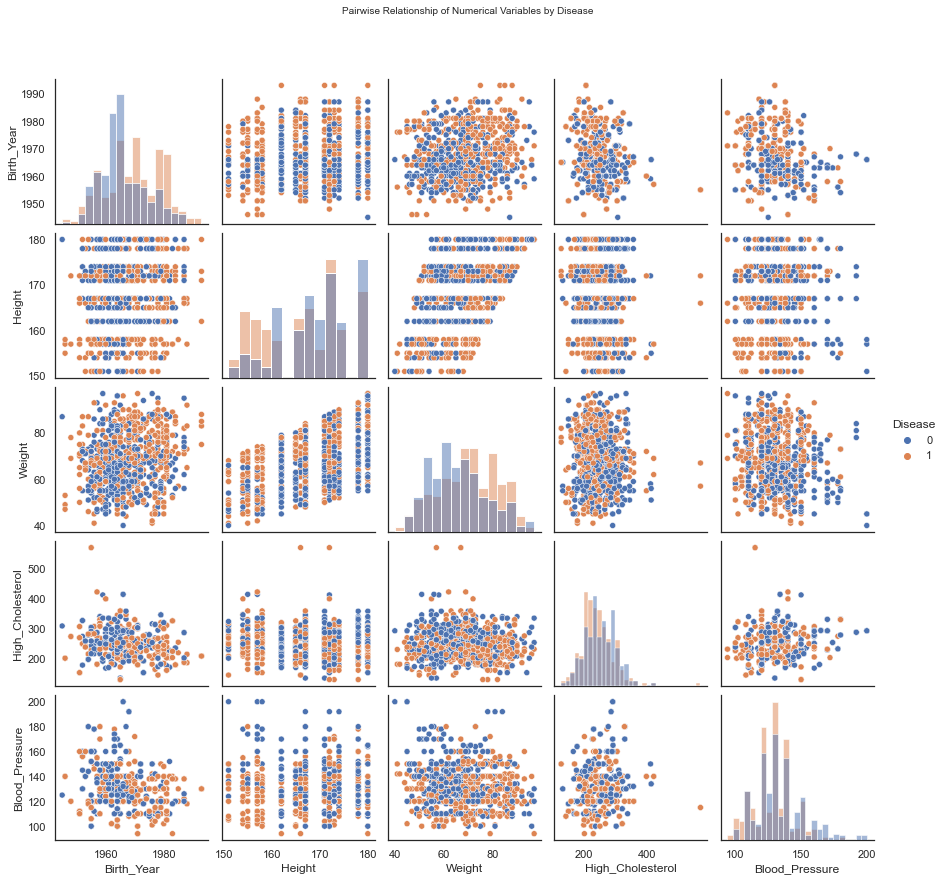

In [33]:
# data to plot
sns.set(style="white")

# Setting pairgrid
g = sns.pairplot(train_df[features], hue="Disease", diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairwise Relationship of Numerical Variables by Disease", fontsize=10)
plt.show()

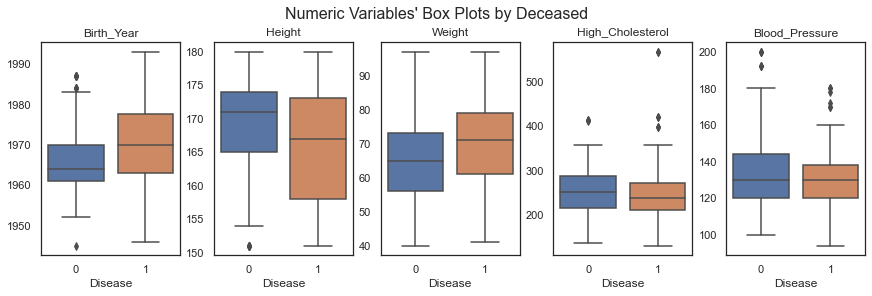

In [34]:
fig, axes = plt.subplots(1, len(metric_feat), figsize=(12, 4), constrained_layout=True)

for ax, f in zip(axes.flatten(), features):
    sns.boxplot(y=f, data=train_df, ax=ax, x='Disease')
    ax.set_title(f)
    ax.set_ylabel('') 
        
plt.suptitle("Numeric Variables' Box Plots by Deceased", fontsize=16)
plt.show()

There seems to be **outliers** in every varible excepting Weight. 

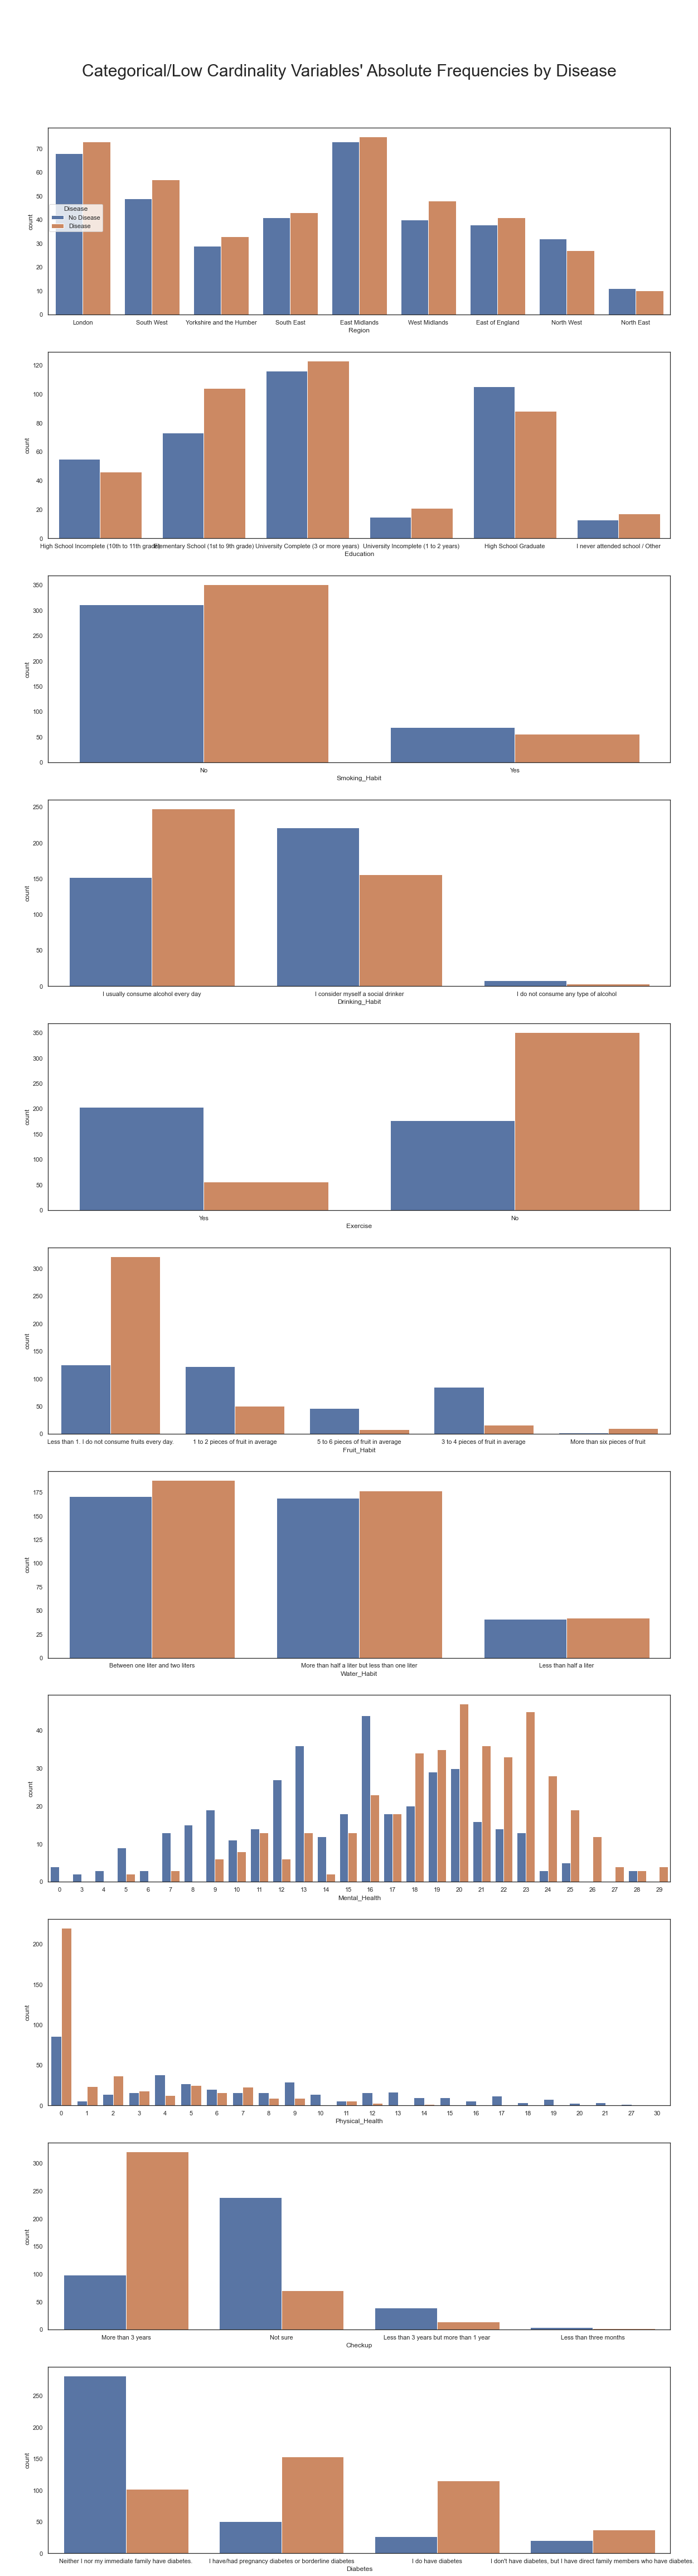

In [52]:
fig, axes = plt.subplots(11, floor(len(non_metric_feat)/11), figsize=(20,80))

for ax, x in zip(axes.flatten(), non_metric_feat):
    if x == "Disease":
        sns.countplot(x=x, hue="Disease", order=[0, 1], data=df, ax=ax)
    else:
        sns.countplot(x=x, hue="Disease", data=train_df, ax=ax)
    ax.get_legend().remove()

handles, _ = axes[0].get_legend_handles_labels()
fig.legend(handles, ["No Disease", "Disease"], loc=(0.07,0.91), title="Disease", title_fontsize=12)

plt.subplots_adjust(wspace=0.25)
plt.suptitle("Categorical/Low Cardinality Variables' Absolute Frequencies by Disease", y=0.90, fontsize=30)

plt.show()

The non-metric features that seem to have an **impact** on the disease are:
  - Drinking_Habit
  - Exercise
  - Fruit_Habit
  - Mental_Health (from 18 onward)
  - Chekup
  - Diabetes
  
There are possible **outliers** in:
  - Checkup (Less than three months)
  - Physical_Health (27 days or more)
  - Fruit_Habit (More than six pieces of fruit)
  - Driking_Habit (I do not consume any type of alcohol)

In [ ]:
train_df.profile_report()

Now, we can change our variables!

#### 1) Direct Binary

In [ ]:
# Several columns are binary strings as 'Yes' and 'No' which can easily be replaced to 0 and 1 
    # train_data['Smoking_Habit'].unique()
    # train_data['Exercise'].unique()

train_df['Exercise'] = train_df['Exercise'].map({'Yes': 1, 'No': 0})
train_df['Smoking_Habit'] = train_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})

train_df.head()

#### 2) By Label Enconding

In [ ]:
label = LabelEncoder()
train_df[non_metric_feat] = train_df[non_metric_feat].apply(label.fit_transform)
train_df.head()

Name is not necessary once we already have the PatientID and it is also a non-relevant feature. There won't be any relation between 'Name' and 'Disease'. 

In [ ]:
train_df.drop('Name', axis=1, inplace=True)
train_df.head()

#### 4) Now we have to check the correlation between each element

In [ ]:
# By spearman correlation we can check correlation between each element

correlation_spearman = train_df.corr('spearman').style.background_gradient(cmap="Blues")
correlation_spearman

In [ ]:
corrmat = train_df.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

#### Lets test several metrics to obtain the best model possible for our model

## Models

#### Create x and y data matrices

In [ ]:
x = train_data.drop(['Disease'], axis = 1)
y = train_data['Disease']

In [ ]:
x.shape, y.shape

#### Data Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                  y,
                                                  test_size = 0.20,
                                                  random_state = 15,
                                                  shuffle = True,
                                                  stratify = y)

In [ ]:
# Check Data Dimension
x_train.shape, y_train.shape

In [ ]:
# Check Data Dimension
x_test.shape, y_test.shape

### 1) Linear Regression Model

In [ ]:
# Defines the regression model
linear_regression_model = linear_model.LinearRegression()

In [ ]:
# Build training model
linear_regression_model.fit(x_train, y_train)

#### Prediction

In [ ]:
y_pred_linear_regression = linear_regression_model.predict(x_test)

#### Model performance

In [ ]:
print('\033[1;4m' + 'Coefficients:' + '\033[0m\n', linear_regression_model.coef_)
print('\033[1m' + '*This as the weight values of each variables' + '\033[0m\n')

print('\n\033[1;4m' + 'Intercept:' + '\033[0m\n', linear_regression_model.intercept_)
print('\n\033[1;4m' + 'Mean squared error (MSE):' + '\033[0m\n' + '%.3f' % mean_squared_error(y_test, y_pred_linear_regression))
print('\n\033[1;4m' + 'Coefficient of determination (R^2):' + '\033[0m\n' + '%.3f' % r2_score(y_test, y_pred_linear_regression))

#### Make Scatter Plot

In [ ]:
xlab = 'Disease'
ylab = 'Predict'
title = 'SCATTER'

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.scatter(y_test, y_pred_linear_regression)

#### We can conclude as obvious that linear regression can't be applied in the Binary Classification. This one only can be applied in cases were predicted value is continuous. This predicted value is binary, called as binary classification

Link: https://www.youtube.com/watch?v=zM4VZR0px8E

### 2) Logistic Regression Model

In [ ]:
logistic_regression_model = LogisticRegression()

In [ ]:
logistic_regression_model.fit(x_train, y_train)

In [ ]:
logistic_regression_model.predict(x_test)

In [ ]:
Logistic_regression_model_accuracy = logistic_regression_model.score(x_test, y_test)


In [ ]:
y_pred_logistic_regression = logistic_regression_model.predict(x_test)

In [ ]:
cf_matrix_logistic_regression_model = confusion_matrix(y_test, y_pred_logistic_regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_logistic_regression_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_logistic_regression_model.flatten()/np.sum(cf_matrix_logistic_regression_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_logistic_regression_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print('\033[1;4mLogistic Regression Model Accuracy is:\033[0m', Logistic_regression_model_accuracy )

In [ ]:
xlab = 'Disease'
ylab = 'Predict'
title = 'SCATTER'

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.scatter(y_test, y_pred_logistic_regression)

### 3) Decision Tree Model

In [ ]:
decision_tree_model = tree.DecisionTreeClassifier()

In [ ]:
decision_tree_model_fit = decision_tree_model.fit(x_train, y_train)

In [ ]:
print('\033[1;4mDecision Tree Model accuracy is:\033[0m', decision_tree_model.score(x_test, y_test))

In [ ]:
y_pred_decision_tree_model = decision_tree_model.predict(x_test)

In [ ]:
cf_matrix_decision_tree_model = confusion_matrix(y_test, y_pred_decision_tree_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_decision_tree_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_decision_tree_model.flatten()/np.sum(cf_matrix_decision_tree_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_decision_tree_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print('\033[1;4mDecision Tree Model accuracy is:\033[0m', decision_tree_model.score(x_test, y_test))

In [ ]:
tree.plot_tree(decision_tree_model_fit)

## WORK IN PROGRESS OVER DECISION TREE